<br>
<br>
<br>
<br>

# Part 5 : Prediction

<br>
<br>
<br>
<br>

<br>
<br>
<br>

# Import libarary

<br>
<br>
<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from GlobalFunction import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('float_format', '{:f}'.format)

sns.set(style="white", color_codes=True)

<br>
<br>
<br>

# Read The Data

<br>
<br>
<br>

In [2]:
df = readCSV("fullData.csv")
trainData = readCSV("TrainData.csv")
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,success_percent_category,pledged_median_category,goal_median_category,tokenized_name,clean_tokenized_name,name_count_words,clean_name_count_words,words_len_mean,name_number_count,name_time_count,name_url_count,stopword_count,symbol_count,name_len,name_is_question,name_is_exclamation,name_is_upper,name_vowel_ratio,name_negative_count,name_positive_count,name_buzzwords_count,name_freq_value,name_success_value,name_posotive_value,name_negative_value
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0,12,11,8,2015,1,59,0.036496,0.405193,0.013337,0.045598,"['The', 'Songs', 'of', 'Adelaide', '&', 'Abull...","['the', 'songs', 'of', 'adelaide', '&', 'abull...",6,6,4.333333,0,0,0,2,5,31,0,0,0.000000,0.346154,0,0,0,0.261817,0.395431,0.000000,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0,4,2,9,2017,5,60,0.167883,0.455267,0.133340,0.318284,"['Greeting', 'From', 'Earth', ':', 'ZGAC', 'Ar...","['greeting', 'from', 'earth', ':', 'zgac', 'ar...",9,9,4.222222,0,0,0,2,8,45,0,0,0.000000,0.236842,0,0,0,0.040789,0.377525,0.000000,0.000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0,0,12,1,2013,5,45,0.167883,0.455267,0.133340,0.318284,"['Where', 'is', 'Hank', '?']","['where', 'is', 'hank', '?']",4,4,3.000000,1,0,0,2,3,14,1,0,0.000000,0.333333,0,0,0,0.054780,0.428571,0.000000,0.000000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0,3,17,3,2012,5,30,0.138686,0.573300,0.065204,0.147856,"['ToshiCapital', 'Rekordz', 'Needs', 'Help', '...","['toshicapital', 'rekordz', 'needs', 'help', '...",7,7,6.142857,0,0,0,1,7,49,0,0,0.000000,0.340909,0,0,1,0.080881,0.495710,0.000000,0.000000
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1,13,26,2,2016,4,35,0.007299,0.116545,0.004295,0.829571,"['Monarch', 'Espresso', 'Bar']","['monarch', 'espresso', 'bar']",3,3,6.000000,0,0,0,0,3,20,0,0,0.000000,0.263158,0,0,0,0.001205,0.420636,0.000000,0.000000


<br>
<br>

## Describe
<br>
<br>

In [3]:
getDescribe(df)

,attribute,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday,duration,backers_median_category,success_percent_category,pledged_median_category,goal_median_category,tokenized_name,clean_tokenized_name,name_count_words,clean_name_count_words,words_len_mean,name_number_count,name_time_count,name_url_count,stopword_count,symbol_count,name_len,name_is_question,name_is_exclamation,name_is_upper,name_vowel_ratio,name_negative_count,name_positive_count,name_buzzwords_count,name_freq_value,name_success_value,name_posotive_value,name_negative_value
0,count,331672.000000,331672,331672,331672,331672,331672,331672,331672.000000,331672,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672,331672,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000
1,unique,NaN,329594,159,15,3102,331252,2,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329524,327969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,top,NaN,New EP/Music Development,Product Design,Film & Video,2014-08-08 00:00:00,2017-08-07 16:43:32,failed,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['New', 'EP/Music', 'Development']",['has_url'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,freq,NaN,15,18680,56526,612,2,197716,NaN,261358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mean,1074270473.552027,NaN,NaN,NaN,NaN,NaN,NaN,116.382580,NaN,9943.549278,41509.658749,0.403881,13.087336,15.285421,6.416149,2014.180024,2.421805,33.954889,0.147764,0.420488,0.078570,0.217135,NaN,NaN,6.368533,6.759377,5.055419,0.235208,0.025067,0.003886,1.285779,5.659474,34.220335,0.004526,0.078837,0.039232,0.309622,0.151810,0.210762,0.261731,0.077656,0.416933,0.015512,0.012825
5,std,619193075.107324,NaN,NaN,NaN,NaN,NaN,NaN,965.431577,NaN,96733.367226,1108934.642072,0.490675,7.715452,8.814433,3.306967,1.930916,1.762932,12.713279,0.163458,0.194412,0.085979,0.170855,NaN,NaN,3.301616,3.558004,1.656021,0.610870,0.158892,0.063562,1.328613,2.725676,15.961502,0.067120,0.269484,0.194146,0.089515,0.404169,0.475278,0.557416,0.096787,0.107660,0.040822,0.041713
6,min,5971.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.010000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,25%,537171096.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,50.000000,2000.000000,0.000000,5.000000,8.000000,4.000000,2013.000000,1.000000,30.000000,0.043796,0.286951,0.021281,0.096727,NaN,NaN,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,21.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.000000,0.000000,0.003126,0.378233,0.000000,0.000000
8,50%,1074574892.500000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,788.000000,5000.000000,0.000000,16.000000,15.000000,6.000000,2014.000000,2.000000,30.000000,0.102190,0.406836,0.044533,0.147856,NaN,NaN,6.000000,6.000000,4.750000,0.000000,0.000000,0.000000,1.000000,5.000000,33.000000,0.000000,0.000000,0.000000,0.325000,0.000000,0.000000,0.000000,0.038200,0.426170,0.000000,0.000000
9,75%,1609843457.750000,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,NaN,4608.000000,15000.000000,1.000000,20.000000,23.000000,9.000000,2016.000000,4.000000,36.000000,0.171533,0.573300,0.113209,0.318284,NaN,NaN,9.000000,9.000000,5.666667,0.000000,0.000000,0.000000,2.00000

<br>
<br>
<br>
<br>

# Part 5 : Build Model

<br>
<br>
<br>
<br>

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def getX(df):
    X = df.copy().select_dtypes(include=numerics)
    X = X.drop(columns=['ID','state_value','pledged','year','backers'])
    return X

def getY(df):
    y = df.copy().state_value.values
    return y

In [5]:
testData = readCSV('TestData.csv')
trainData = readCSV('TrainData.csv')

<br>
<br>
<br>

#  build  Random Forest Classifier model 

<br>
<br>
<br>

In [6]:
X = getX(trainData)
y = getY(trainData)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
rand_forest = RandomForestClassifier(min_samples_split = 2,min_samples_leaf = 5)
rand_forest.fit(X_train,y_train)

y_pred_test = rand_forest.predict(X_test)
test_score = metrics.accuracy_score(y_test, y_pred_test)
print('test score: ' ,test_score)

cv_scores = cross_val_score(rand_forest, X, y, cv=5, scoring='accuracy')
print('cv_mean: ' ,cv_scores.mean())


        

C:\Users\shova\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


test score:  0.7182273431070317
cv_mean:  0.7173011414904501


<br>
<br>
<br>

## Evaluate Random Forest Classifier 

<br>
<br>
<br>

In [8]:
X_train = getX(trainData)
y_train = getY(trainData)

In [9]:
rand_forest = RandomForestClassifier(min_samples_split = 2,min_samples_leaf = 5)
rand_forest = rand_forest.fit(X_train,y_train)

C:\Users\shova\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
X_test = getX(testData)
y_test = getY(testData)

In [11]:
y_pred = rand_forest.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6956132497761862

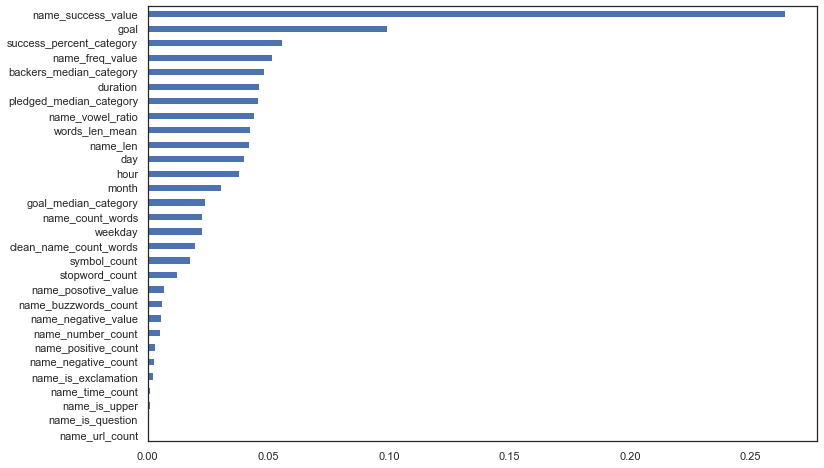

In [12]:
feat_importances = pd.Series(rand_forest.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh',figsize=(12,8))
plt.show()

<br>
<br>
<br>

#  build decision trees model 

<br>
<br>
<br>

In [13]:
X = getX(trainData)
y = getY(trainData)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
parameters_range = [2,3,4,5,7,9,13,17]
parameters = []
test_score_list_dt = []
cv_mean_scores = []

for d in parameters_range:
    for m in parameters_range:
        parameters.append((d,m))
        clf = DecisionTreeClassifier(max_depth=d,min_samples_split=m)
        clf.fit(X_train,y_train)
        
        y_pred_test = clf.predict(X_test)
        test_score = metrics.accuracy_score(y_test, y_pred_test)
        test_score_list_dt.append(test_score)   

        cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        cv_mean_scores.append(cv_scores.mean())
        

Text(0, 0.5, 'Testing Accuracy')

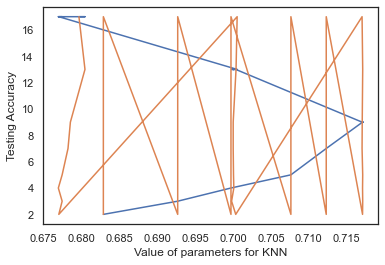

In [15]:
plt.plot(test_score_list_dt, parameters)
plt.xlabel('Value of parameters for KNN')
plt.ylabel('Testing Accuracy')

In [16]:
index = cv_mean_scores.index(max(cv_mean_scores))
maxCV = max(cv_mean_scores)
maxDepth = parameters[index][0]
minSplit = parameters[index][1]
accuracyScore = test_score_list_dt[index]
print('Max of parameters cross validation: ', maxCV)
print("Max depth: " , maxDepth)
print("Min samples split: " , minSplit)
print("Accuracy score on test data: " ,accuracyScore)


Max of parameters cross validation:  0.7161628730445211
Max depth:  9
Min samples split:  2
Accuracy score on test data:  0.7170924612390935


<br>
<br>
<br>

## Evaluate decision trees

<br>
<br>
<br>

In [17]:
X_train = getX(trainData)
y_train = getY(trainData)

In [18]:
X.shape

(238961, 30)

In [19]:
clf = DecisionTreeClassifier(max_depth=maxDepth,min_samples_split=minSplit)
clf = clf.fit(X,y)

In [20]:
X_test = getX(testData)
y_test = getY(testData)

In [21]:
X.shape

(238961, 30)

In [22]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6884188499746524

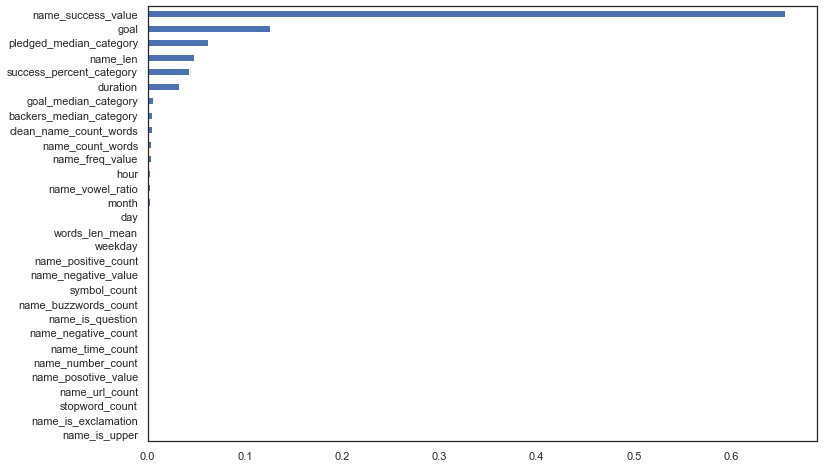

In [23]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh',figsize=(12,8))
plt.show()

<br>
<br>
<br>

#  build KNN model 

<br>
<br>
<br>

In [24]:
X = getX(trainData)
y = getY(trainData)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [26]:
k_range = [3,11,17,23,45,57,63,75,91]
knn_scores = []
knn_cv_mean_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, y_pred))
    
    cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    knn_cv_mean_scores.append(cv_scores.mean())

Text(0, 0.5, 'Testing Accuracy')

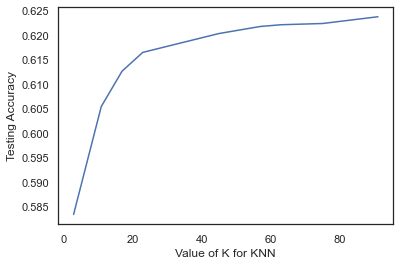

In [27]:
plt.plot(k_range, knn_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [28]:
index = knn_cv_mean_scores.index(max(knn_cv_mean_scores))
maxCV = max(knn_cv_mean_scores)
k = k_range[index]
knnAccuracyScore = knn_scores[index]
print('Max of k_score cross validation: ', maxCV)
print("K : " , k)
print("Accuracy score on test data: " ,knnAccuracyScore)


Max of k_score cross validation:  0.6250936086601276
K :  91
Accuracy score on test data:  0.6236961866401632


## Evaluate K-NN

In [29]:
X_train = getX(trainData)
y_train = getY(trainData)

In [30]:
knn = KNeighborsClassifier(n_neighbors=45)
knn = knn.fit(X_train, y_train)

In [31]:
X = getX(testData)
y = getY(testData)

In [32]:
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

0.6279405895740527